<a href="https://colab.research.google.com/github/imasial/DeepLearning/blob/main/High_Code_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

:
Welcome to my Deep Learning Project, One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

I apply Artificial Neural Network (ANN) and convolutional neural networks (CNNs).


----------------
## **Objective**
----------------

My primary goal is to develop models capable of accurately recognizing digits in real-world street images. The project aims to compare the performance of different architectures, including fully connected feedforward neural networks and CNNs, to select the most effective model
-------------
## **Dataset**
-------------

Here, I will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.


## **Mount the drive**

Let us start by mounting the Google drive.

In [ ]:
from  google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical


**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.18.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

h5f=h5py.File('/content/drive/MyDrive/Colab Notebooks/Elective Project/SVHN_single_grey1.h5', 'r')

X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train),len(X_test)

(42000, 18000)

**Observation:** there is 42000 images in Train and 18000 in test total number of images are 60000

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

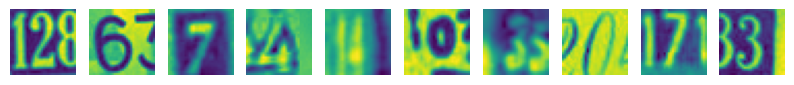

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i])

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print("shape:",X_train[0].shape)
print()
print("First Image",X_train[0])

shape: (32, 32)

First Image [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
#we reshape it from 2d to 1d
X_train=X_train.reshape(X_train.shape[0],1024)
X_test=X_test.reshape(X_test.shape[0],1024)

#normalize

X_train=X_train/255
X_test=X_test/255



Print the shapes of Training and Test data

In [ ]:
print("train data",X_train.shape,y_train.shape)
print("test data",X_test.shape,y_test.shape)

train data (42000, 1024) (42000,)
test data (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**
Each entry of the target variable is one-hot encoded vector instead of single lable

## **Model Building**

Now data preprocessing Done, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- i will use a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
def ann_1():
  model=Sequential()

  model.add(Dense(64,input_dim=1024,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model_1=ann_1()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#fit the model

history_model_1 = model_1.fit(X_train,y_train,validation_split=0.2,batch_size=128,epochs=20,verbose=1)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1088 - loss: 2.3082 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2136 - loss: 2.1555 - val_accuracy: 0.3082 - val_loss: 1.9401
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3152 - loss: 1.9157 - val_accuracy: 0.3895 - val_loss: 1.7608
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4284 - loss: 1.6865 - val_accuracy: 0.5140 - val_loss: 1.4962
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5220 - loss: 1.4552 - val_accuracy: 0.5551 - val_loss: 1.3685
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5637 - loss: 1.3511 - val_accuracy: 0.5808 - val_loss: 1.3059
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5881 - loss: 1.2858 - val_accuracy: 0.6064 - val_loss: 1.2505
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6087 - loss: 1.2382 - val_accuracy: 0

### **Plot the Training and Validation Accuracies and write down your Observations.**

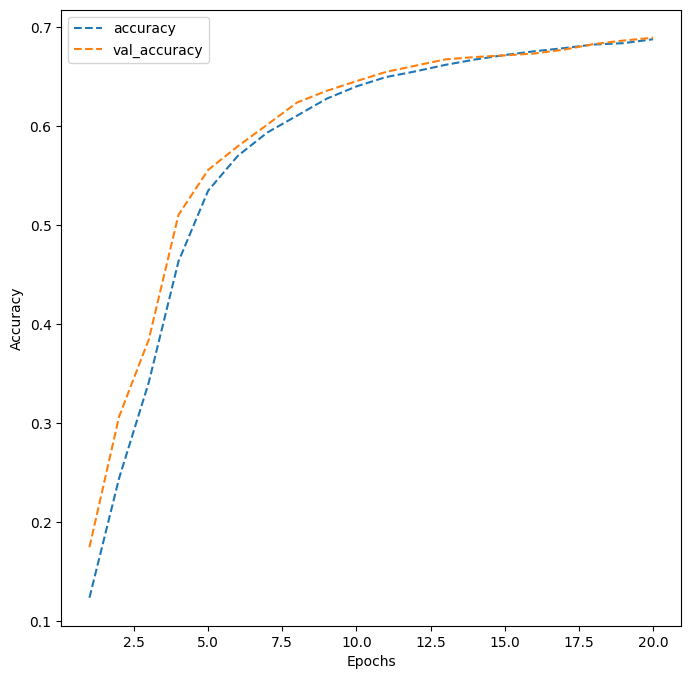

In [ ]:
dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**

**1.Over All Trend**

The training accuracy in blue line and validation accuracy in orang line show increase over epochs,the model start first with low accuracy at 0.1 and improve significtly over the epchos

**2.No Sign of Overfiiting**

the curve for traning and validation accuracy are very close to each other throug out the training process , suggested that model will perform well on unseen data

**3.Convergence**

after around **15-20 Epchos**, The accuracy start to level off , showing that model has reached its learning capcity

**Final Accuracy Level**

Final accuracy approach 0.70

**Recemendation**

**Complexity**
increase model complexity by addding more layer

**Fine Tune HyperParameter**
experiment with diffrent batch size,dropout rate, or activation function

**Data Augmentaion** may help improve validation acccuracy

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def ann_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Dense(256,input_dim=1024,activation='relu'))

    model.add(Dense(128,activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(64,activation='relu'))

    model.add(Dense(64,activation='relu'))

    model.add(Dense(32,activation='relu'))

    model.add(BatchNormalization())

    model.add(Dense(10,activation='softmax'))

    # Compile the model

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [ ]:
model_2=ann_model_2()

In [ ]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.0986 - loss: 2.4460 - val_accuracy: 0.1018 - val_loss: 2.3215
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1237 - loss: 2.2911 - val_accuracy: 0.2107 - val_loss: 2.1337
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3206 - loss: 1.8877 - val_accuracy: 0.4724 - val_loss: 1.6061
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5022 - loss: 1.4797 - val_accuracy: 0.5598 - val_loss: 1.3107
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5701 - loss: 1.3070 - val_accuracy: 0.6133 - val_loss: 1.1854
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6002 - loss: 1.2147 - val_accuracy: 0.6371 - val_loss: 1.1258
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6376 - loss: 1.1316 - val_accuracy: 0.6608 - val_loss: 1.0553
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6581 - loss: 1.0764 - val_accuracy: 0

### **Plot the Training and Validation Accuracies and write down your Observations.**

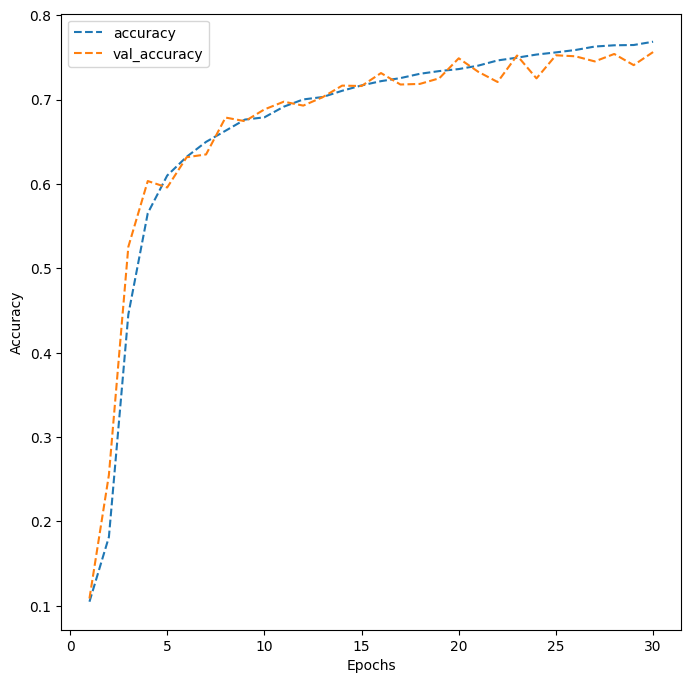

In [ ]:
dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**

**1.Over All Trend**
The training accuracy in blue line and validation accuracy in orang line show increase over epochs, it shows that model is learing effeciently

**2.Early Training Phase**

initailly both training and validation accuracy increas rapidly , it shows that model is capturing pattren in the data

**3.Convergence**

after around **20 Epchos**, The accuracy gain slow down and the traingin & validation accuracy start platue , this sugesst that model is at optimal

**Final Accuracy Level**

Training accuracy approaches **0.76** validation accuracy remain slightly lower

**Recemendation**

**Continue Training with Early stoping**
since accuracy is plateaude so early stop can reduce computation cost

**Fine Tune HyperParameter** slightly adjustment to the learning rate or dropout rate may help in improving validation performance

**Data Augmentaion** may help improve validation acccuracy

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1814
           1       0.73      0.81      0.77      1828
           2       0.84      0.71      0.77      1803
           3       0.72      0.73      0.73      1719
           4       0.79      0.74      0.76      1812
           5       0.65      0.79      0.71      1768
           6       0.78      0.72      0.75      1832
           7       0.72      0.85      0.78      1808
           8       0.81      0.66      0.72      1812
           9       0.75      0.74      0.74      1804

    accuracy                           0.75     18000
   macro avg       0.76      0.75      0.75     18000
weighted avg       0.76      0.75      0.75     18000



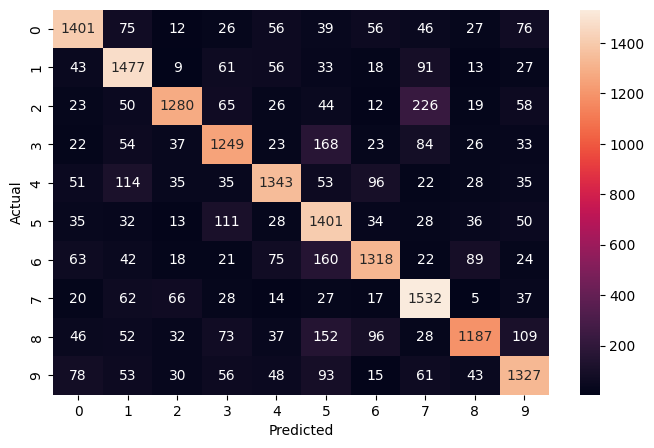

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**

**Classifcation Report**
The classification report provides performance metrics for each class:

**Overall Accuracy: 75% **
The model correctly classifies 75% of the test images.
**Macro Average **
(Precision, Recall, F1-Score): 0.76, 0.75, 0.75  Indicates that the model performs relatively consistently across classes.

**Weighted Average:** 0.76, 0.75, 0.75  Weights each class based on its sample size, suggesting balanced performance.

**Class-wise Observations**

**Best Class:**

**Class 7:** Precision 0.72, Recall 0.85, F1-score 0.78.
The model identifies images of this class more accurately than others.
**Calss 2:**Precision 0.84, Recall 0.71, F1-score 0.77 – Strong precision, indicating fewer false positives.

**Weakest Class:**

**Class 5:** Precision 0.65, Recall 0.79, F1-score 0.71 – High recall indicates the model correctly identifies many 5s, but the low precision suggests frequent misclassifications.




**The confusion matrix highlights misclassification patterns:**

**Diagonal Elements:**

The matrix shows high diagonal values, indicating correct predictions. However, many off-diagonal elements suggest confusion among similar digits.

**Significant Misclassifications:**

Class 2 misclassified as Class 7: 226 instances – Likely due to similar visual structures.
Class 5 misclassified as Class 3: 168 instances – Indicates the model struggles to distinguish these digits.
Class 6 misclassified as Class 5: 160 instances – Suggests shared shape characteristics.
Notable Pattern:

The digit 5 appears repeatedly as the recipient of misclassifications from other digits.


 **Recommendations for Improvement**

**Data Augmentation:**
Apply transformations like rotation, zoom, and shifts to improve generalization, especially for classes like 3 and 5.

**Regularization:**
Increase the dropout rate in CNN layers or add L2 regularization.

**Hyperparameter Tuning:**
Adjust learning rates, batch sizes, and filter sizes for better optimization.

**Class Weighting:**
Assign higher weights to underperforming classes during training.

**CNN Architecture Adjustments:**

Add additional convolutional layers or use advanced architectures like ResNet or VGG for better feature extraction.



## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/Elective Project/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**

- There are 42,000 images in the training data and 18,000 images in the testing data.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train,num_classes=10)

y_test = to_categorical(y_test,num_classes=10)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten # Import necessary layers

def cnn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(16,kernel_size=(3,3),padding='same',input_shape=(32,32,1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(32,kernel_size=(3,3),padding='same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    model.add(Dense(10,activation='softmax'))

    # Compile the model

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [ ]:
cnn_model_1 = cnn_model_1()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print the model summary

cnn_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_model_1 = cnn_model_1.fit(X_train,y_train,validation_split=0.2,batch_size=32,verbose=1,epochs=20)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4049 - loss: 1.6765 - val_accuracy: 0.8221 - val_loss: 0.6148
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8346 - loss: 0.5647 - val_accuracy: 0.8368 - val_loss: 0.5505
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8661 - loss: 0.4551 - val_accuracy: 0.8582 - val_loss: 0.4962
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8870 - loss: 0.3873 - val_accuracy: 0.8692 - val_loss: 0.4750
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9030 - loss: 0.3341 - val_accuracy: 0.8698 - val_loss: 0.4772
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9173 - loss: 0.2916 - val_accuracy: 0.8695 - val_loss: 0.4920
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9280 - loss: 0.2566 - val_accuracy: 0.8679 - val_loss: 0.5218
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9324 - loss: 0.2314 -

### **Plot the Training and Validation Accuracies and Write your observations.**

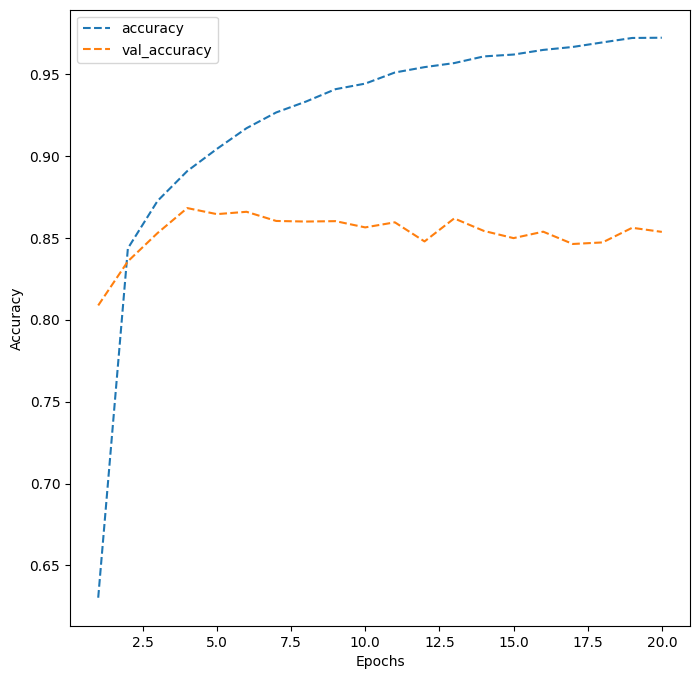

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:__________**

**1. Training Log Analysis**

From the training log:

The model starts with:

**Epoch 1:** Training accuracy: 40.49%, Validation accuracy: 82.21%
Initial training accuracy is low, but validation accuracy starts high, suggesting a good initial model performance.
As training progresses:

Accuracy rapidly increases, reaching:
**Epoch 5:** Training accuracy: 90.30%, Validation accuracy: 86.98%

**Epoch 10:** Training accuracy: 94.67%, Validation accuracy: 86.05%

**Epoch 15:** Training accuracy: 95.98%, Validation accuracy: 85.74%

**Final Values (Epoch 20):**

Training accuracy: ~ 97.26%
Validation accuracy: ~ 86.11%

**Loss Analysis:**

Training Loss: Decreases consistently from 1.675 to 0.0843.
Validation Loss: Decreases initially but increase after epochs 7.

**Accuracy Plot Insights**
From the accuracy plot:

The training accuracy (blue dashed line) continues to increase consistently.
The validation accuracy (orange dashed line) plateaus around 85% after approximately epoch 10 and even starts to slightly decrease afterward.

**Key Insight:**
The widening gap between training and validation accuracy indicates **overfitting.**

**Recommendations to Address Overfitting**
**Regularization Techniques:**

Increase the Dropout Rate (e.g., add a Dropout layer with rate=0.3 after the convolutional layers).
Apply L2 regularization to the dense layers.

**Data Augmentation:**

Apply image transformations such as rotation, zooming, shifting, and horizontal flips to make the model more robust.

**Early Stopping:**

Implement early stopping based on validation loss with a patience of 3–5 epochs to prevent overfitting.

**Learning Rate Scheduling:**

Use a learning rate scheduler to reduce the learning rate as the model approaches convergence.

**Batch Size Adjustment:**

Experiment with larger batch sizes (e.g., from 32 to 64 or 128) to improve generalization.





Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model

def cnn_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(16,kernel_size=(3,3),padding='same',input_shape=(32,32,1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(32,kernel_size=(3,3),padding='same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size=(2,2)))



    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10,activation='softmax'))


    # Compile the model

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'] )

    return model

In [ ]:
# Build the model

cnn_model_2 = cnn_model_2()

In [ ]:
cnn_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,434 (1.02 MB)

 Trainable params: 267,370 (1.02 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# Fit the model

history_cnn_model_2 = cnn_model_2.fit(X_train,y_train,validation_split=0.2,batch_size=128,verbose=1,epochs=30)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.2548 - loss: 2.0594 - val_accuracy: 0.6831 - val_loss: 2.0414
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6979 - loss: 0.9478 - val_accuracy: 0.8281 - val_loss: 0.9709
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7505 - loss: 0.7897 - val_accuracy: 0.8324 - val_loss: 0.5700
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7816 - loss: 0.7042 - val_accuracy: 0.8487 - val_loss: 0.5300
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7960 - loss: 0.6574 - val_accuracy: 0.8500 - val_loss: 0.5121
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8044 - loss: 0.6289 - val_accuracy: 0.8443 - val_loss: 0.5242
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8104 - loss: 0.5971 - val_accuracy: 0.8486 - val_loss: 0.5101
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8206 - loss: 0.5739 - val_accuracy: 0

### **Plot the Training and Validation accuracies and write your observations.**

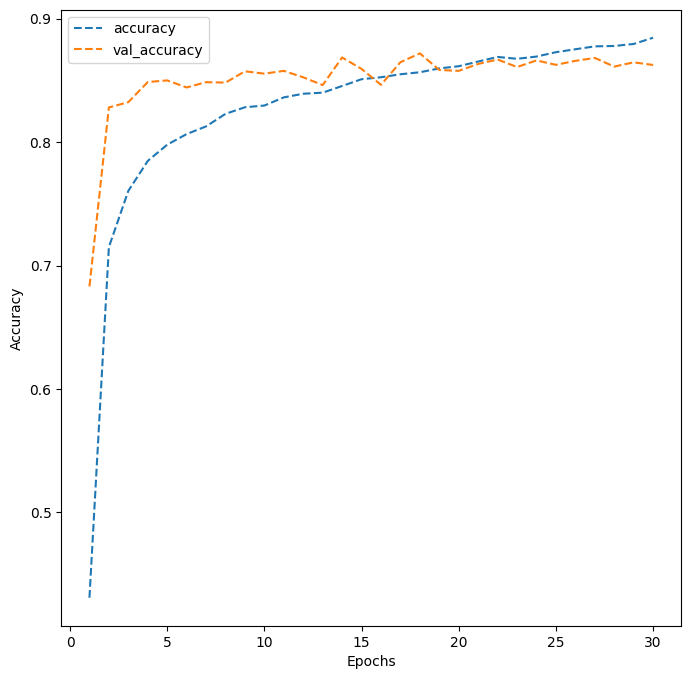

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:________**

**1. Training Log Analysis**
From the epoch logs:

**Epoch 1:**

Training accuracy: 25.48%
Validation accuracy: 68.31%
Loss Training : 2.0594
Loss Validation: 2.0414
The model starts with low training accuracy but a relatively high validation accuracy, indicating good initial pattern recognition.

**Mid Training (Epoch 15):**

Training accuracy: 85.93%
Validation accuracy: 85.93%
Loss Training : 0.4781
Loss Validation: 0.4925

**Final Training (Epoch 30):**

Training accuracy: 88.30%
Validation accuracy: 86.25%
Loss Training : 0.3575
Loss Validation: 0.5259

the training accuracy steadly increase from 25.48 to 88.30%
the training loss decrease consistently

**2. Accuracy Plot Insights**
From the plot:

**The training accuracy (blue line)** steadily increases throughout the epochs.
**The validation accuracy (orange line)** increases initially but begins to oscillate after around epoch 10, fluctuating between 84% and 86%.
Key Insight:
The gap between training and validation accuracy is small but noticeable, signaling mild **overfitting**.

**3. Model Performance Analysis**
Training Performance: Good, with accuracy surpassing 84%.
Validation Performance: Also good, but it plateaus and fluctuates around 85%.
Model Stability:
The validation curve's oscillations suggest that the model struggles with consistency.

**4. Recommendations for Improvement**

**Learning Rate Scheduler:**
Implement a scheduler to reduce the learning rate dynamically when validation accuracy stops improving.

**Early Stopping:**
Add early stopping with a patience of 3–5 epochs to halt training when validation performance no longer improves.

**Regularization:**

Add Dropout layers (e.g., with rate=0.3) in the CNN layers.
Introduce L2 regularization to the dense layers.
Data Augmentation:

Apply transformations like rotations, shifts, and zooms to make the model more robust.

**Increase Model Complexity:**

Add additional convolutional layers with smaller kernel sizes to capture more granular patterns.

**Batch Size Adjustment:**

Experiment with increasing the batch size from 32 to 64 or 128.





## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make prediction on the test data using model_2

test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1814
           1       0.86      0.89      0.87      1828
           2       0.87      0.90      0.88      1803
           3       0.70      0.87      0.78      1719
           4       0.87      0.90      0.89      1812
           5       0.88      0.85      0.86      1768
           6       0.90      0.81      0.85      1832
           7       0.93      0.88      0.90      1808
           8       0.82      0.84      0.83      1812
           9       0.91      0.81      0.86      1804

    accuracy                           0.86     18000
   macro avg       0.87      0.86      0.86     18000
weighted avg       0.87      0.86      0.86     18000



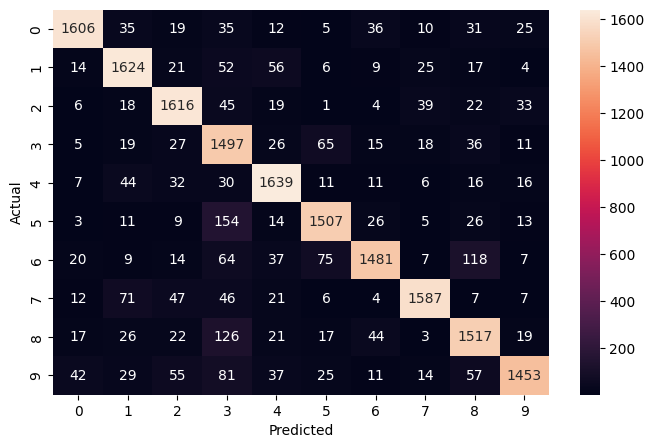

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**

**1. Classification Report Analysis**
The model achieved the following performance:

**Overall Accuracy: 86%**

The model correctly classifies 86% of the test images, which is a solid improvement from earlier runs.

**Macro Average (Precision, Recall, F1-Score): 0.87,0.86,0.86**

Balanced performance across different classes.

**Weighted Average: 0.87,0.86,0.86 **

The model performs consistently even with varying class distributions.

**2. Class-wise Performance**
**Strongest Classes:**

Class 7: Precision 0.93, Recall 0.88, F1-score 0.90 – This indicates the model has learned the features for digit 7 exceptionally well.
Class 0: Precision 0.99, Recall 0.89, F1-score 0.91 – The model also excels in recognizing digit 0.

**Weakest Class:**

Class 3: Precision 0.70, Recall 0.87, F1-score 0.78 – The model struggles more with digit 3, suggesting that this class might share visual characteristics with others, like 5 or 8.

**3. Confusion Matrix Insights**
The confusion matrix provides a clear picture of how predictions are distributed.

**Diagonal Dominance:**

Most of the predictions lie along the diagonal, indicating high accuracy for most digits.

**Significant Misclassifications:**

Class 3 misclassified as Class 5: 65 instances – These digits might share structural similarities.
Class 8 misclassified as Class 3: 126 instances – Likely confusion due to similar visual patterns.
Class 7's Exceptional Performance:

Few misclassifications across all classes, validating the high precision and recall for this class.

**4. Model Performance Trends**
The model demonstrates strong learning capability with 86% accuracy.
Class imbalance or similar features among certain digits (like 3, 5, and 8) lead to the most confusion.

**5. Recommendations for Improvement**
Class-Specific Augmentation:

Apply data augmentation specifically to classes 3, 5, and 8 to enhance the model's understanding of these digits.

**Feature Engineering Improvements:**

Investigate the convolutional layers' outputs for these problematic classes to uncover patterns.
**Loss Function Tuning:**

Experiment with focal loss to give more weight to challenging classes.
**Increase Model Depth:**

Add additional convolutional layers or explore architectures like ResNet or VGG.
**Misclassification Analysis:**

Visualize misclassified images to identify systematic issues (e.g., digits written in unusual styles).

**6. Conclusion**
The CNN model has achieved significant improvements, with a commendable 87% accuracy.

.


/bin/bash: line 1: jupyternbconvert--tohtmlHigh_Code_SVHN_Digit_Recognition.ipynb: command not found
